### shearing of image

In [1]:
import cv2
import numpy as np

# Define shearing factors (adjust as needed)
shear_x = 0.40 # shear along x-axis
shear_y = -0.23 # shear along y-axis

# create transformation matrix
M = np.array([[1,shear_x,0],
             [shear_y,1,0],
             [0,0,1]])
img = cv2.imread('lenna.png')
rows,cols, _ = img.shape
T = np.float32([[1,0,0],[0,1,150]])
img_translation = cv2.warpAffine(img,T ,(int(cols*1.5),int(rows*1.5)))
sheared_img = cv2.warpPerspective(img_translation, M, (int(cols*1.5),int(rows*1.5)))

cv2.imshow("img",sheared_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


### shearing with skimage

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


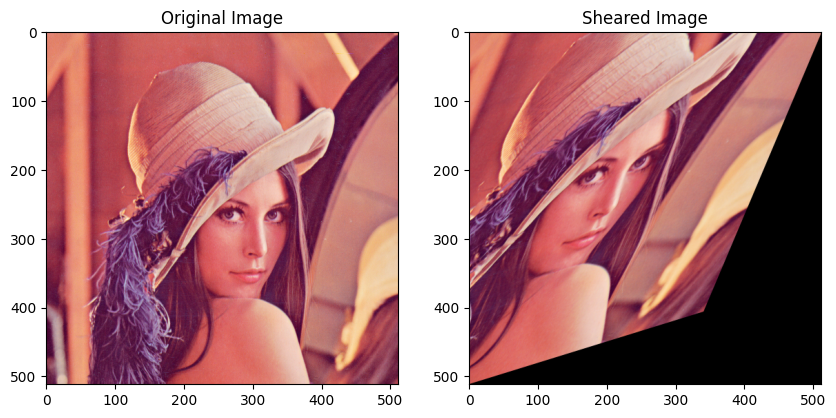

In [2]:
from skimage import transform
from skimage import io

img = io.imread('lenna.png')

# Define shearing factors (adjust as needed)
shear_x = -0.40 # shear along x-axis
shear_y = -0.3 # shear along y-axis

# create transformation matrix
tform = transform.AffineTransform(shear=(shear_x,shear_y))
#apply trannsformation using warp
img_sheared = transform.warp(img,tform)

#display images(using matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img),plt.title('Original Image')
plt.subplot(122),plt.imshow(img_sheared),plt.title('Sheared Image')
plt.show()

In [3]:
import cv2
import numpy as np

img = cv2.imread('lenna.png')

tx = 50  #translational along x-axis
ty = 100  #translational along y-axis
shear_x = 0.3 # shear along x-axis
shear_y = 0.2 # shear along y-axis
angle = 45  #rotation angle in degrees
scale = 1.2  #scaling factor

#create transformation matrix
M = np.float32([[scale * np.cos(np.radians(angle)), shear_x,tx],
                 [shear_y,scale * np.cos(np.radians(angle)),ty]])
#apply transformation using warpaffine
img_affine = cv2.warpAffine(img,M,(512,512))

new_img = np.vstack([img,img_affine])

#display original and affine transformed images
cv2.imshow('Affine Transformed Image',new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

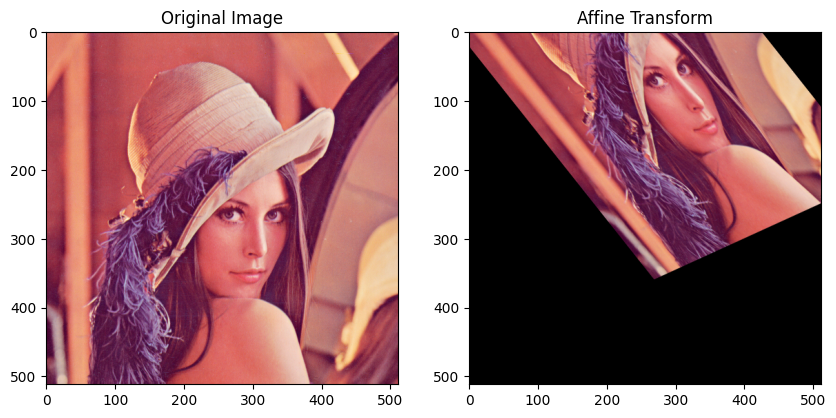

In [4]:
from skimage import transform
from skimage import io

img = io.imread('lenna.png')

tx = 20  #translational along x-axis
ty = 100  #translational along y-axis
shear_x = 0.3 # shear along x-axis
shear_y = 0.2 # shear along y-axis
angle = 30  #rotation angle in degrees
scale = 1.2  #scaling factor

# create transformation matrix
tform = transform.AffineTransform(scale=(scale,scale),
                                 rotation = np.radians(angle),
                                 translation=(tx,ty),
                                 shear=(shear_x,shear_y))
#apply trannsformation using warp
img_sheared = transform.warp(img,tform)

#display images(using matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img),plt.title('Original Image')
plt.subplot(122),plt.imshow(img_sheared),plt.title('Affine Transform')
plt.show()

In [5]:
tform

<AffineTransform(matrix=
    [[  1.16085651,  -0.92147166,  20.        ],
     [  0.38933755,   0.85362873, 100.        ],
     [  0.        ,   0.        ,   1.        ]]) at 0x10e80d55bd0>

In [6]:
#importing packaging
import tkinter
from PIL import ImageTk,Image
import os

#creating main window
root =tkinter.Tk()

#loading the image
img = ImageTk.PhotoImage(Image.open('lenna.png'))

#reading the image
panel = tkinter.Label(root,image = img)

#setting the application
panel.pack(side = "bottom",fill = "both",
          expand = "yes")

#running the application
root.mainloop()

In [7]:
import cv2
import numpy as np

img = cv2.imread('lenna.png')

#define source and destination points(4 corresponding points)
source_points = np.array([[100,50],[200,50],[200,150],[100,150]],dtype = np.float32)
destination_points = np.array([[50,50],[250,50],[250,250],[50,250]],dtype = np.float32)
#copute transformation matrix
M = cv2.findHomography(source_points,destination_points)[0]

#apply transformation using warpperspective
img_transformed = cv2.warpPerspective(img,M,(1024,1024))

#display original and transfomed images
cv2.imshow('original Image',img)
cv2.imshow('projectively transformed Image',img_transformed)
cv2.waitKey(0)
cv2.destroyAllWindows()

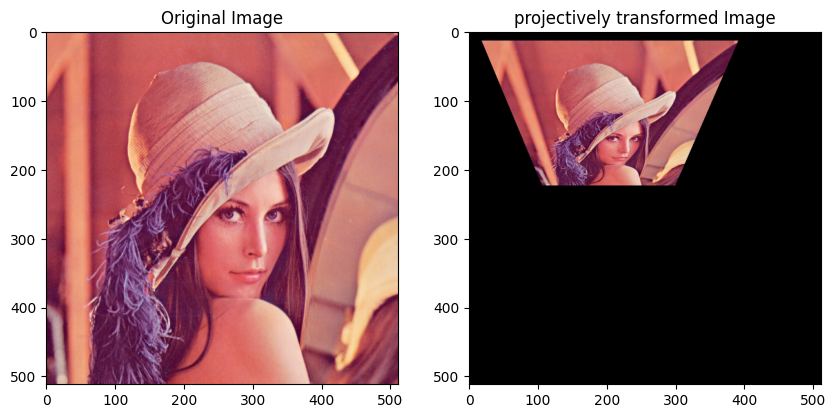

In [8]:
from skimage import transform
from skimage import io

img = io.imread('lenna.png')

#define source and destination points(4 corresponding points)
source_points = [[100,50],[200,50],[200,150],[100,150]]
destination_points =[[100,50],[250,50],[250,250],[50,250]]

# create transformation matrix
tform = transform.ProjectiveTransform()

#fit transformation using source and destination points
tform.estimate(source_points,destination_points)

#apply transfomation using warp
img_transformed = transform.warp(img,tform)

#display images(using matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img),plt.title('Original Image')
plt.subplot(122),plt.imshow(img_transformed ),plt.title('projectively transformed Image')
plt.show()

In [9]:
import cv2
import numpy as np

gray = cv2.imread('lenna.png',0)
#gray = cv2.cvtcolor(img,cv2.COLOR_BGR2GRAY)  #convert to gray if needed
#threshold to create binary image  
ret , thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)

#Erosion-remove noise
eroded = cv2.erode(thresh,np.ones((3,3),np.uint8))

#Dilation-expand objects
dilated = cv2.dilate(thresh,np.ones((3,3),np.uint8))

#opening -reduce noice while preserving object size
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,np.ones((3,3),np.uint8))

#closing fill small holes
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,np.ones((3,3),np.uint8))

#display results
cv2.imshow('Oringinal Image',thresh)
cv2.imshow('Eroded',eroded)
cv2.imshow('Opening',opening)
cv2.imshow('Closing',closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
import cv2
import numpy as np

image1 = cv2.imread('lenna.png')
gray = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)  #convert to gray if needed

#threshold to create binary image  
ret , thresh1 = cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
ret , thresh2 = cv2.threshold(gray,120,255,cv2.THRESH_BINARY_INV)

#display results
cv2.imshow('binary threshold Image',thresh1)
cv2.imshow('inv binary threshold Image',thresh2)
cv2.waitKey(0)
cv2.destroyAllWindows()

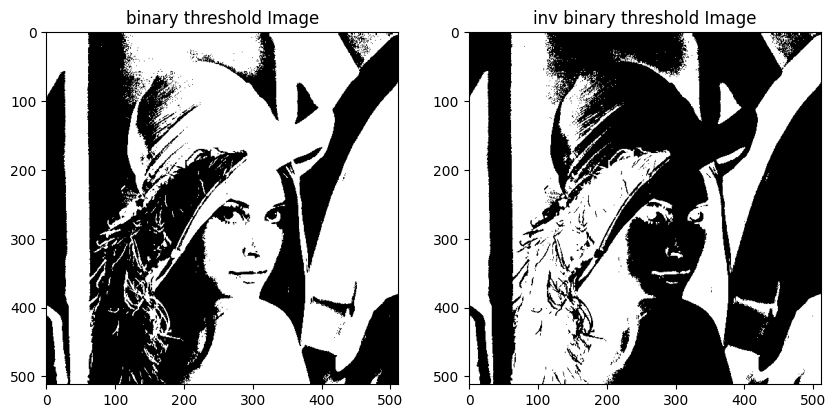

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread('lenna.png')
gray = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)  #convert to gray if needed

#threshold to create binary image  
ret , thresh1 = cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
ret , thresh2 = cv2.threshold(gray,120,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1),plt.imshow(thresh1,cmap = 'gray'),plt.title('binary threshold Image')
plt.subplot(1,2,2),plt.imshow(thresh2,cmap = 'gray'),plt.title('inv binary threshold Image')
plt.show()


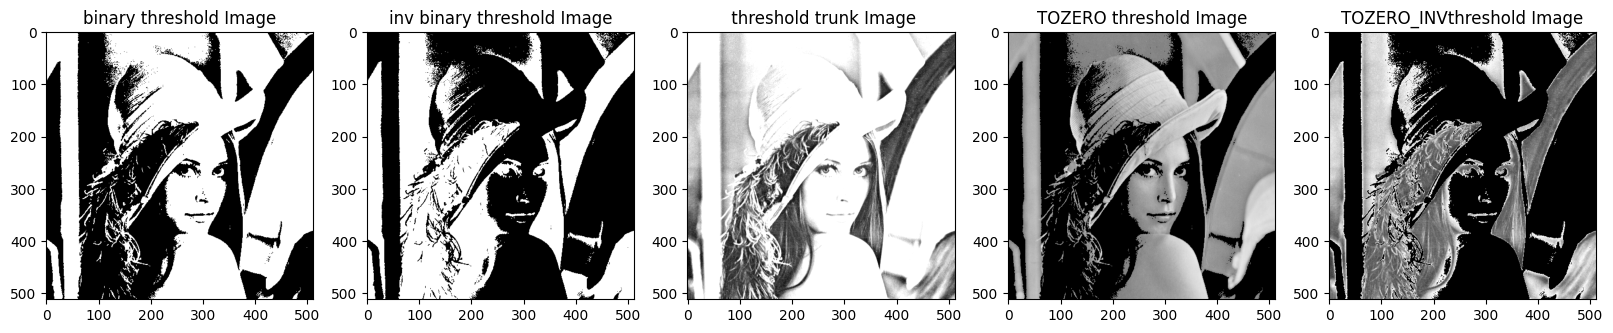

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread('lenna.png')
gray = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)  #convert to gray if needed

#threshold to create binary image  
ret , thresh1 = cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
ret , thresh2 = cv2.threshold(gray,120,255,cv2.THRESH_BINARY_INV)
ret , thresh3 = cv2.threshold(gray,120,255,cv2.THRESH_TRUNC)
ret , thresh4 = cv2.threshold(gray,120,255,cv2.THRESH_TOZERO)
ret , thresh5 = cv2.threshold(gray,120,255,cv2.THRESH_TOZERO_INV)

plt.figure(figsize=(20,10))
plt.subplot(1,5,1),plt.imshow(thresh1,cmap = 'gray'),plt.title('binary threshold Image')
plt.subplot(1,5,2),plt.imshow(thresh2,cmap = 'gray'),plt.title('inv binary threshold Image')
plt.subplot(1,5,3),plt.imshow(thresh3,cmap = 'gray'),plt.title(' threshold trunk Image')
plt.subplot(1,5,4),plt.imshow(thresh4,cmap = 'gray'),plt.title('TOZERO threshold Image')
plt.subplot(1,5,5),plt.imshow(thresh5,cmap = 'gray'),plt.title('TOZERO_INVthreshold Image')
plt.show()


#### otsu threshold

In [ ]:
import cv2
import numpy as np


image1 = cv2.imread('lenna.png')
gray = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)  #convert to gray if needed

ret , thresh1 = cv2.threshold(gray,120,255,cv2.THRESH_BINARY)